# Problem one

Solve (by hand) the following initial value problems:

**(a)** $y'(x)=2e^{2x}-1$, $y(0)=1$;

**(b)** $y'(x)=e^{x+y}$, $y(0)=0$.

# Problem two

In order to graph the approximation produced by Euler's method and produce Figure 1 of Chapter 9, the $y$-values `[1, 1.5, 2.25, 3.375]` were hard-coded. Check that these values are correct. Now, write an implementation of Euler's method in Python, that is to say, write a function called ``Euler`` which behaves the same way as `odeint`, but which produces its list of approximate $y$-values using Euler's method.

Copy all the code which produced Figure 1 and replace the line
`y = [1, 1.5, 2.25, 3.375]`
with the line
`y = Euler(f, 1, x)`.
Does the code still work?

Experiment with adjusting the step size in both approximation methods.

[1, 1.5, 2.25, 3.375]


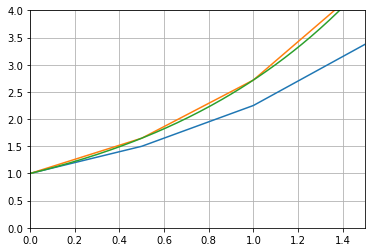

In [4]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt
%matplotlib inline

def Euler(f, y0, x):
    n = len(x)
    y = [y0]
    
    for i in range(n-1):
        h = x[i+1] - x[i]
        y.append(y[i] + h*f(y[i], x[i]))
        
    return y

def f(y, x): # odeint expects the dependent variable as the first argument
    return y

y0 = 1

x_range = (0, 1.5)
y_range = (0, 4)

#fig, ax = plt.subplots()
#ax.set_aspect('equal')
#plt.title('Figure 1: Numerical approximation methods')
plt.grid(True)

h = 0.5
x = np.arange(x_range[0], x_range[1] + h, h) # arange returns a half-open interval
y = Euler(f, y0, x)
print(y)
plt.plot(x, y)

h = 0.5
x = np.arange(x_range[0], x_range[1] + h, h)
y = odeint(f, y0, x)
plt.plot(x, y)

h = 0.01
x = np.arange(x_range[0], x_range[1] + h, h)
y = np.exp(x)
plt.plot(x, y)

plt.xlim(x_range)
plt.ylim(y_range)

plt.show()

# Problem three

Use the `odeint` function to plot the solution to the initial value problem

$$
    \frac{dy}{dx}=x+\frac{1}{5}y, \hspace{10mm} y(0)=-3
$$

on the interval $[0,5]$.

If you have managed to successfully implement the `Euler` function from Problem 2, plot (on the same graph) the approximate solutions using Euler's method with step sizes $h=1$ and $h=0.1$.

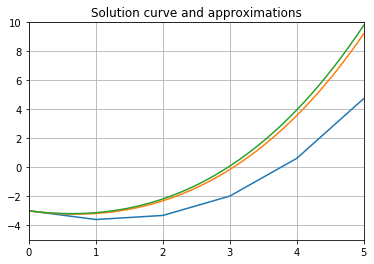

In [2]:
def f(y, x):
    return x + y/5

y0 = -3

x_range = (0, 5)
y_range = (-5, 10)

#fig, ax = plt.subplots()
#ax.set_aspect('equal')
plt.title('Solution curve and approximations')
plt.grid(True)

h = 1
x = np.arange(x_range[0], x_range[1] + h, h)
y = Euler(f, y0, x)
plt.plot(x, y)

h = 0.1
x = np.arange(x_range[0], x_range[1] + h, h)
y = Euler(f, y0, x)
plt.plot(x, y)

h = 0.01
x = np.arange(x_range[0], x_range[1] + h, h)
y = odeint(f, y0, x)
plt.plot(x, y)

plt.xlim(x_range)
plt.ylim(y_range)

plt.show()